In [2]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv')
df[df['Country/Region'] == 'Germany']
df.at['Total', df.columns] = df.iloc[:, 4:].sum()

KeyError: 'Index'

In [145]:
dates = np.array(df.columns)
newDF = df.iloc[60, 4:34]
newDF.columns = ['ds', 'y']
ndf = pd.DataFrame(data=newDF)
actDF = df.iloc[60, 4:]
actDF.columns = ['ds', 'y']
actdf = pd.DataFrame(data=actDF)

In [146]:
modified = ndf.reset_index()
modified.columns = ['ds', 'y']
actmod = actdf.reset_index()
actmod.columns = ['ds', 'y']

In [147]:
m = Prophet()
m.fit(modified)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [148]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
32,2020-02-23
33,2020-02-24
34,2020-02-25
35,2020-02-26
36,2020-02-27


In [149]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32,2020-02-23,4.394632,3.754073,5.060236
33,2020-02-24,4.394768,3.725706,5.014322
34,2020-02-25,4.394909,3.752236,5.013217
35,2020-02-26,4.473335,3.836398,5.126330
36,2020-02-27,4.473461,3.841627,5.113140


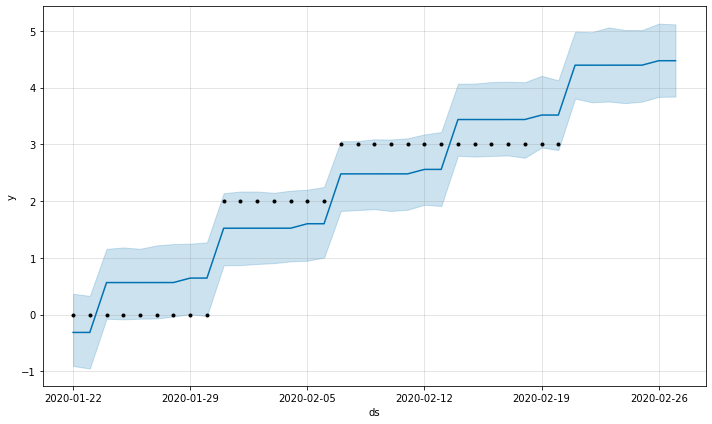

In [151]:
fig1 = m.plot(forecast)

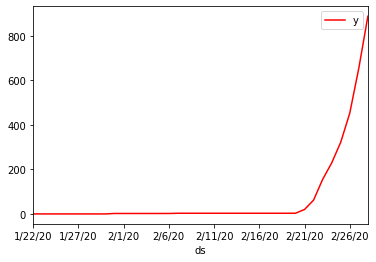

In [152]:
actmod.plot(kind='line',x='ds',y='y',color='red')
plt.show()